### **Import Library**

In [4]:
import pandas as pd
import requests
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.cloud import storage
from io import StringIO
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


##### note:
df1 = projects_data.csv
<br>
df2 = population_data.csv
<br>
df3 = population_data.json
<br>
df4 = population_data.xml
<br>
df5 = population_data.db
<br>
df6 = gdp_data.csv
<br>
df7 = mystery.csv
<br>
df8 = electricity_access_percent.csv
<br>
df9 = rural_population_percent.csv
<br>
df10 = api

### **Ekstrak Data**

#### **a. CSV**

In [5]:
df1 = pd.read_csv('data/projects_data.csv')
print('Projects Data:')
display(df1.head())

Projects Data:


C:\Users\Sekar\AppData\Local\Temp\ipykernel_1344\2764896372.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('data/projects_data.csv')


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [6]:
df2 = pd.read_csv('data/population_data.csv', skiprows=4)
print('Population Data:')
display(df2.head())

Population Data:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [7]:
df6 = pd.read_csv('data/gdp_data.csv', skiprows=4)
print('GDP Data:')
display(df6.head())

GDP Data:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [8]:
df7 = pd.read_csv('data/mystery.csv', encoding='utf-16')
print('Mystery Data:')
display(df7.head())

Mystery Data:


,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [9]:
df8 = pd.read_csv('data/electricity_access_percent.csv', skiprows=4)
print('Electricity Access Percent Data:')
display(df8.head())

Electricity Access Percent Data:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


In [10]:
df9 = pd.read_csv('data/rural_population_percent.csv', skiprows=4)
print('Rural Population Percent Data:')
display(df9.head())

Rural Population Percent Data:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


#### **b. JSON**

In [11]:
df3 = pd.read_json('data/population_data.json')
print('Population Data:')
display(df3.head())

Population Data:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


#### **c. XML**

In [12]:
with open('data/population_data.xml', 'r') as f:
    xml_data = f.read()

soup = BeautifulSoup(xml_data, 'lxml')
data = []
for record in soup.find_all('record'):
    record_data = {}
    for field in record.find_all('field'):
        name = field.get('name')
        value = field.text
        record_data[name] = value
    data.append(record_data)

df4 = pd.DataFrame(data)

display(df4.head())

,Country or Area,Item,Year,Value
0,Aruba,"Population, total",1960,54211
1,Aruba,"Population, total",1961,55438
2,Aruba,"Population, total",1962,56225
3,Aruba,"Population, total",1963,56695
4,Aruba,"Population, total",1964,57032


#### **d. DB**

In [13]:
conn = sqlite3.connect('data/population_data.db')
cursor = conn.cursor()

query = 'SELECT "Country_Name", "Country_Code", "1960" FROM population_data'
cursor.execute(query)

data = cursor.fetchall()

conn.close()

df5 = pd.DataFrame(data)
display(df5.head())

,0,1,2
0,Aruba,ABW,54211.0
1,Afghanistan,AFG,8996351.0
2,Angola,AGO,5643182.0
3,Albania,ALB,1608800.0
4,Andorra,AND,13411.0


#### **e. API**

In [14]:
url = 'http://api.worldbank.org/v2/countries/br;cn;us;id/indicators/SP.POP.TOTL/?format=json&per_page=1000'

response = requests.get(url)

if response.status_code == 200:
    #ubah respons JSON jadi objek Python
    data = response.json()[1]
    #list kosong untuk menyimpan data
    data_list = []
    #looping setiap elemen dalam data
    for item in data:
        #ambil nilai 'value' dari 'indicator' dan 'country'
        indicator = item['indicator']['value']
        country = item['country']['value']
        
        # Menambahkan data ke dalam list data_list
        data_list.append({
            'Indicator': indicator,
            'Country': country,
            'Country Code': item['countryiso3code'],
            'Date': item['date'],
            'Value': item['value'],
            'Decimal': item['decimal']
        })
    
    # Membuat DataFrame dari list data_list
    df10 = pd.DataFrame(data_list)
    
    # Menampilkan lima baris pertama dari DataFrame
    display(df10.head())
else:
    print('Error:', response.status_code)


,Indicator,Country,Country Code,Date,Value,Decimal
0,"Population, total",Brazil,BRA,2023,NaN,0
1,"Population, total",Brazil,BRA,2022,215313498.0,0
2,"Population, total",Brazil,BRA,2021,214326223.0,0
3,"Population, total",Brazil,BRA,2020,213196304.0,0
4,"Population, total",Brazil,BRA,2019,211782878.0,0


In [15]:
df10.to_csv('data/world_bank_data.csv', index=False)

### **Transform**

In [16]:
#fungsi untuk cek missing values & duplikasi data

def cek_missing_values_duplicate_data(data):
    #missing values
    missing_values = data.isnull().sum()
    print('Jumlah Missing Values:\n', missing_values)

    #duplikasi data
    duplicate_rows = data.duplicated().sum()
    print('Jumlah Duplikasi Data:', duplicate_rows)


#### **Rural Population Percent & Electricity Access Percent**


In [18]:
df8.info()
df8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


In [19]:
cek_missing_values_duplicate_data(df8)

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


In [20]:
df9.info()
df9.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            259 non-null    float64
 5   1961            259 non-null    float64
 6   1962            259 non-null    float64
 7   1963            259 non-null    float64
 8   1964            259 non-null    float64
 9   1965            259 non-null    float64
 10  1966            259 non-null    float64
 11  1967            259 non-null    float64
 12  1968            259 non-null    float64
 13  1969            259 non-null    float64
 14  1970            259 non-null    float64
 15  1971            259 non-null    float64
 16  1972            259 non-null    float64
 17  1973            259 non-null    flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [21]:
cek_missing_values_duplicate_data(df9)

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


##### **a. Handle Missing Values & Hapus Kolom yang Tidak Digunakan**

In [22]:
#atasi missing values
df8.fillna(0, inplace=True)
df9.fillna(0, inplace=True)

#hapus kolom tidak digunakan
df8.drop(columns=['Unnamed: 62'], inplace=True)
df9.drop(columns=['Unnamed: 62'], inplace=True)

#cek
df8.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [23]:
df9.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


##### **b. Gabung Rural & Electricity**

In [24]:
for combined_data in [df8, df9]:
    combined_data = combined_data[['Country Name', 'Country Code'] + [str(year) for year in range(1960, 2017)]]

#gabung data rural_population_percent dan electricity_access_percent
combined_data = pd.merge(df8, df9, on=['Country Name', 'Country Code'], how='inner', suffixes=('_electricity', '_rural'))

#menampilkan bilangan tanpa dibelakang koma
pd.options.display.float_format = '{:.0f}'.format

#print dataset gabungan
print("\nDataset gabungan:")
display(combined_data.head())

#simpanke file CSV
combined_data.to_csv('cleaned_data/cleaned_combined_rural_electricity_data.csv', index=False)



Dataset gabungan:


,Country Name,Country Code,Indicator Name_electricity,Indicator Code_electricity,1960_electricity,1961_electricity,1962_electricity,1963_electricity,1964_electricity,1965_electricity,...,2008_rural,2009_rural,2010_rural,2011_rural,2012_rural,2013_rural,2014_rural,2015_rural,2016_rural,2017_rural
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,0,0,0,0,0,0,...,56,57,57,57,58,58,58,58,59,59
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0,0,0,0,0,0,...,76,76,75,75,75,74,74,73,73,72
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,0,0,0,0,0,0,...,61,61,60,59,58,58,57,56,55,54
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0,0,0,0,0,0,...,50,49,48,47,46,45,44,43,42,41
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,0,0,0,0,0,0,...,11,12,12,13,13,14,14,15,15,16


##### **c. Update Combined Data Rural & Electricity**

In [35]:
combined_data = pd.read_csv('cleaned_data/cleaned_combined_rural_electricity_data.csv')

# Melt DataFrame untuk mengubah kolom tahun-tahun menjadi satu kolom 'Year_Type' dan nilai presentase menjadi satu kolom 'Value'
df_melted = pd.melt(combined_data, id_vars=['Country Name', 'Country Code'], var_name='Year_Type', value_name='Value')

# Splitting 'Year_Type' column into 'Year' and 'Type' columns
df_melted[['Year', 'Type']] = df_melted['Year_Type'].str.rsplit('_', n=1, expand=True)

# Konversi kolom 'Value' menjadi numerik
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

# Pivot data to reshape it back into a wider format
df_pivot = df_melted.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Type', values='Value').reset_index()

# Rename columns
df_pivot.columns.name = None
df_pivot = df_pivot.rename(columns={'electricity': 'electricityaccesspercent', 'rural': 'ruralpopulationpercent'})

# Menampilkan DataFrame hasil akhir dengan kolom yang diinginkan
update_combine_rural_electricity_df = df_pivot[['Country Name', 'Country Code', 'Year', 'electricityaccesspercent', 'ruralpopulationpercent']]
display(update_combine_rural_electricity_df.head(10))

,Country Name,Country Code,Year,electricityaccesspercent,ruralpopulationpercent
0,Afghanistan,AFG,1960,0,92
1,Afghanistan,AFG,1961,0,91
2,Afghanistan,AFG,1962,0,91
3,Afghanistan,AFG,1963,0,91
4,Afghanistan,AFG,1964,0,91
5,Afghanistan,AFG,1965,0,90
6,Afghanistan,AFG,1966,0,90
7,Afghanistan,AFG,1967,0,90
8,Afghanistan,AFG,1968,0,89
9,Afghanistan,AFG,1969,0,89


In [ ]:
cek_missing_values_duplicate_data(combined_data)

Jumlah Missing Values:
 Country Name                  0
Country Code                  0
Indicator Name_electricity    0
Indicator Code_electricity    0
1960_electricity              0
                             ..
2013_rural                    0
2014_rural                    0
2015_rural                    0
2016_rural                    0
2017_rural                    0
Length: 122, dtype: int64
Jumlah Duplikasi Data: 0


In [37]:
#simpan ke csv
update_combine_rural_electricity_df.to_csv('cleaned_data/update_combine_rural_electricity.csv', index=False)

#### Population Data

#### **Projects Data**

##### **a. Hapus Kolom yang Tidak Diperlukan**

In [ ]:
#hapus kolom yang tidak digunakan
drop_columns = ['url', 'projectdoc ', 'majorsector_percent ', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector', 'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5', 'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ', 'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name', 'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName', 'Latitude', 'Longitude', 'Country']
df1.drop(columns = drop_columns, inplace=True)

In [ ]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18248 non-null  object 
 1   regionname                18248 non-null  object 
 2   countryname               18248 non-null  object 
 3   prodline                  18248 non-null  object 
 4   lendinginstr              18002 non-null  object 
 5   lendinginstrtype          18002 non-null  object 
 6   envassesmentcategorycode  12437 non-null  object 
 7   supplementprojectflg      18195 non-null  object 
 8   productlinetype           18248 non-null  object 
 9   projectstatusdisplay      18244 non-null  object 
 10  status                    18244 non-null  object 
 11  project_name              18248 non-null  object 
 12  boardapprovaldate         16744 non-null  object 
 13  board_approval_month      16744 non-null  object 
 14  closin

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,borrower,impagency,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,June,NaN,"500,000",0,0,0,"500,000",NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,June,2023-12-31T00:00:00Z,"200,000,000",0,"200,000,000","200,000,000",0,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,June,NaN,"50,000,000",0,"58,330,000","58,330,000",0,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,June,2023-06-28T00:00:00Z,"50,000,000",0,"20,000,000","20,000,000",0,IIST,IIST,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,June,2023-05-31T00:00:00Z,"100,000,000",0,"100,000,000","100,000,000",0,NaN,NaN,NaN


In [ ]:
df1.drop(columns=['Unnamed: 56'], inplace=True)
df1.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,borrower,impagency
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,2018-06-28T00:00:00Z,June,NaN,"500,000",0,0,0,"500,000",NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z,"200,000,000",0,"200,000,000","200,000,000",0,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,2018-06-28T00:00:00Z,June,NaN,"50,000,000",0,"58,330,000","58,330,000",0,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z,"50,000,000",0,"20,000,000","20,000,000",0,IIST,IIST
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z,"100,000,000",0,"100,000,000","100,000,000",0,NaN,NaN


In [ ]:
df1.columns
df1.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
dtype: object

##### **b. Penyesuaian Tipe Data**

In [ ]:
#ambil value sebelum tanda ;
df1['countryname'] = df1['countryname'].str.split(';').str[0]

#penyesuaian tipe data ke datetime dan format tahun-bulan-tanggal
df1['boardapprovaldate'] = pd.to_datetime(df1['boardapprovaldate'], format='%Y-%m-%dT%H:%M:%SZ')
df1['closingdate'] = pd.to_datetime(df1['closingdate'], format='%Y-%m-%dT%H:%M:%SZ')

#hapus koma dari kolom tertentu dan mengubah ke numerik
cols = ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt','grantamt']
df1[cols] = df1[cols].replace({',':''}, regex=True)
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')


df1.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,borrower,impagency
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,2018-06-28,June,NaT,500000,0,0,0,500000,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,2018-06-28,June,2023-12-31,200000000,0,200000000,200000000,0,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,2018-06-28,June,NaT,50000000,0,58330000,58330000,0,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,2018-06-27,June,2023-06-28,50000000,0,20000000,20000000,0,IIST,IIST
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,2018-06-27,June,2023-05-31,100000000,0,100000000,100000000,0,NaN,NaN


##### **c. Handle Missing Values**

In [ ]:
#ATASI MISSING VALUES
df1['boardapprovaldate'] = df1['boardapprovaldate'].ffill()
df1['closingdate'] = df1['closingdate'].bfill()
df1['lendinginstr'] = df1['lendinginstr'].bfill()
df1['lendinginstrtype'] = df1['lendinginstrtype'].bfill()
df1['lendinginstrtype'] = df1['lendinginstrtype'].bfill()
df1['board_approval_month'] = df1['board_approval_month'].bfill()
df1['lendprojectcost'] = df1['lendprojectcost'].bfill()
df1['supplementprojectflg'] = df1['supplementprojectflg'].bfill()
df1['envassesmentcategorycode'] = df1['envassesmentcategorycode'].fillna(df1['envassesmentcategorycode'].mode())[0] #ambil nilai modus pertama di kolomnya, tanpa [0] nilai nan masih ada
df1['borrower'] = df1['borrower'].fillna(df1['borrower'].mode())[0]
df1['impagency'] = df1['impagency'].fillna(df1['impagency'].mode())[0]

df1.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,borrower,impagency
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,2018-06-28,June,2023-12-31,500000,0,0,0,500000,EET,IIST
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,C,N,L,Active,...,2018-06-28,June,2023-12-31,200000000,0,200000000,200000000,0,EET,IIST
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,C,Y,L,Active,...,2018-06-28,June,2023-06-28,50000000,0,58330000,58330000,0,EET,IIST
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,C,N,L,Active,...,2018-06-27,June,2023-06-28,50000000,0,20000000,20000000,0,EET,IIST
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,C,N,L,Active,...,2018-06-27,June,2023-05-31,100000000,0,100000000,100000000,0,EET,IIST


In [ ]:
df1.dtypes

id                                  object
regionname                          object
countryname                         object
prodline                            object
lendinginstr                        object
lendinginstrtype                    object
envassesmentcategorycode            object
supplementprojectflg                object
productlinetype                     object
projectstatusdisplay                object
status                              object
project_name                        object
boardapprovaldate           datetime64[ns]
board_approval_month                object
closingdate                 datetime64[ns]
lendprojectcost                    float64
ibrdcommamt                          int64
idacommamt                           int64
totalamt                             int64
grantamt                             int64
borrower                            object
impagency                           object
dtype: object

##### **d. Dummy Variabel**

In [ ]:
#membuat dummy variabel
cols_categorical = ['status', 'projectstatusdisplay']
df1 = pd.get_dummies(df1, columns=cols_categorical)

df1

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,project_name,...,borrower,impagency,status_Active,status_Closed,status_Dropped,status_Pipeline,projectstatusdisplay_Active,projectstatusdisplay_Closed,projectstatusdisplay_Dropped,projectstatusdisplay_Pipeline
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Creating a Trade in Value-Added Database for ...,...,EET,IIST,True,False,False,False,True,False,False,False
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,C,N,L,Productive Inclusion Project,...,EET,IIST,True,False,False,False,True,False,False,False
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,C,Y,L,Additional Financing for Health Sector Support...,...,EET,IIST,True,False,False,False,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,C,N,L,Public-Private Partnerships and Public Investm...,...,EET,IIST,True,False,False,False,True,False,False,False
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,C,N,L,Nigeria For Women Project,...,EET,IIST,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,C,N,L,Power and Irrigation Project,...,EET,IIST,False,True,False,False,False,True,False,False
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,C,N,L,Steel Mill and Railway Project,...,EET,IIST,False,True,False,False,False,True,False,False
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,C,N,L,Post War Reconstruction Project,...,EET,IIST,False,True,False,False,False,True,False,False
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,C,N,L,Post-war Reconstruction Project,...,EET,IIST,False,True,False,False,False,True,False,False


In [ ]:
cek_missing_values_duplicate_data(df1)

Jumlah Missing Values:
 id                               0
regionname                       0
countryname                      0
prodline                         0
lendinginstr                     0
lendinginstrtype                 0
envassesmentcategorycode         0
supplementprojectflg             0
productlinetype                  0
project_name                     0
boardapprovaldate                0
board_approval_month             0
closingdate                      0
lendprojectcost                  0
ibrdcommamt                      0
idacommamt                       0
totalamt                         0
grantamt                         0
borrower                         0
impagency                        0
status_Active                    0
status_Closed                    0
status_Dropped                   0
status_Pipeline                  0
projectstatusdisplay_Active      0
projectstatusdisplay_Closed      0
projectstatusdisplay_Dropped     0
projectstatusdisplay_Pipeline  

##### **e. Handle Outliers**

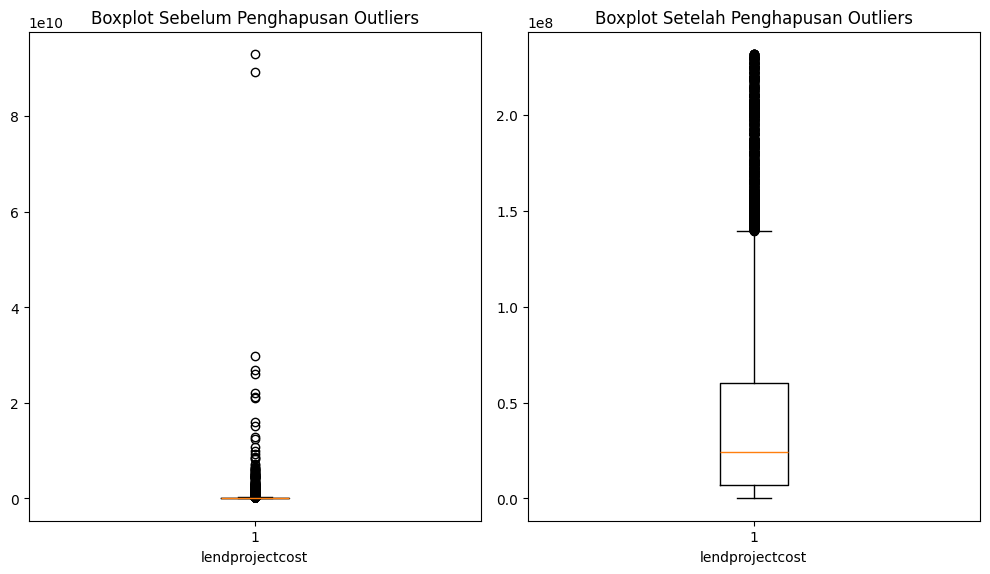

In [ ]:
#visualisasi data sebelum penghapusan outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df1['lendprojectcost'])
plt.title('Boxplot Sebelum Penghapusan Outliers')
plt.xlabel('lendprojectcost')

#hitung IQR
Q1 = df1['lendprojectcost'].quantile(0.25)
Q3 = df1['lendprojectcost'].quantile(0.75)
IQR = Q3 - Q1

#batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#penanganan outliers
df1 = df1[(df1['lendprojectcost'] >= lower_bound) & (df1['lendprojectcost'] <= upper_bound)]

#visualisasi data setelah penghapusan outliers
plt.subplot(1, 2, 2)
plt.boxplot(df1['lendprojectcost'])
plt.title('Boxplot Setelah Penghapusan Outliers')
plt.xlabel('lendprojectcost')

plt.tight_layout()
plt.show()


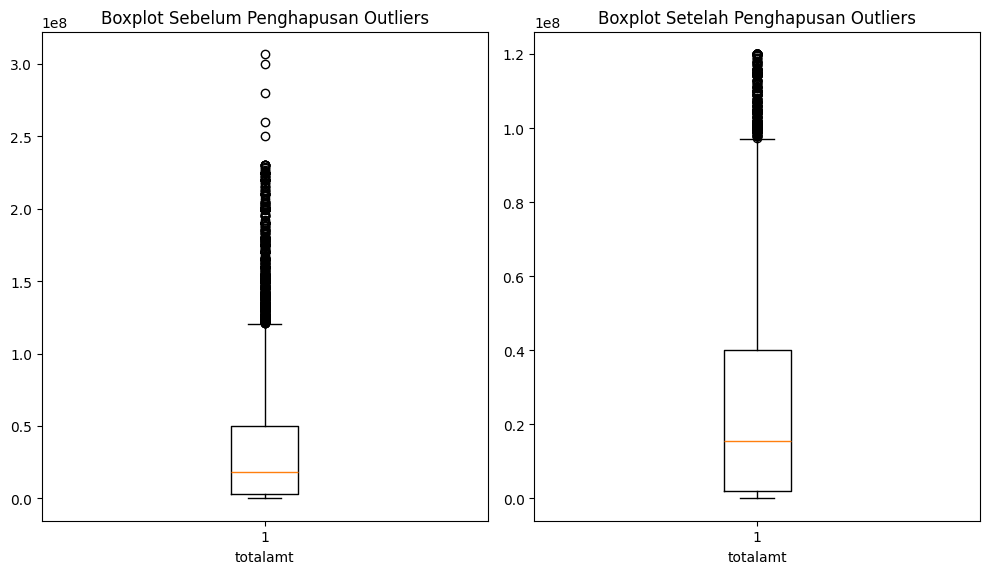

In [ ]:
#visualisasi data sebelum penghapusan outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df1['totalamt'])
plt.title('Boxplot Sebelum Penghapusan Outliers')
plt.xlabel('totalamt')

#hitung IQR
Q1 = df1['totalamt'].quantile(0.25)
Q3 = df1['totalamt'].quantile(0.75)
IQR = Q3 - Q1

#batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#penanganan outliers
df1 = df1[(df1['totalamt'] >= lower_bound) & (df1['totalamt'] <= upper_bound)]

#visualisasi data setelah penghapusan outliers
plt.subplot(1, 2, 2)
plt.boxplot(df1['totalamt'])
plt.title('Boxplot Setelah Penghapusan Outliers')
plt.xlabel('totalamt')

plt.tight_layout()
plt.show()


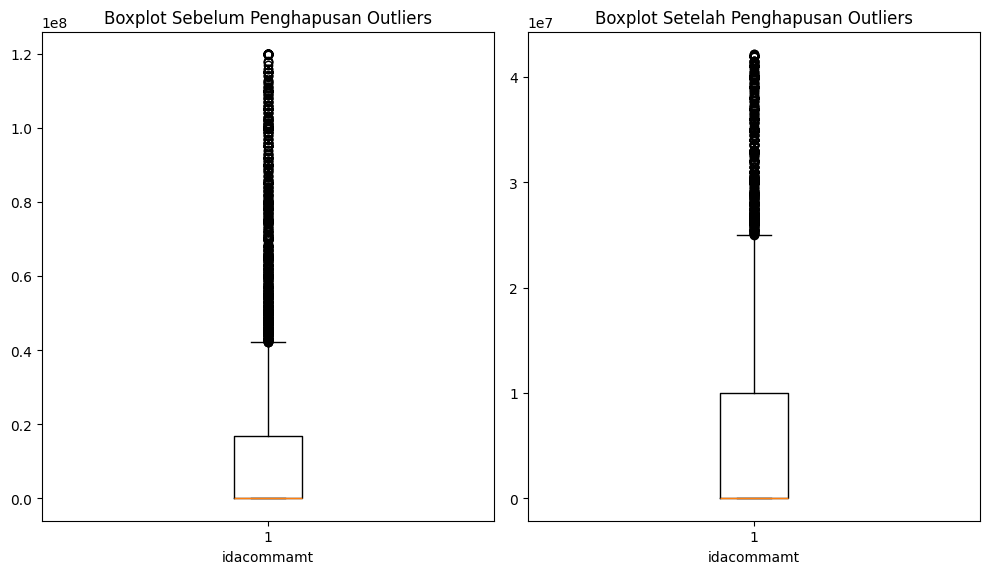

In [ ]:
#visualisasi data sebelum penghapusan outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df1['idacommamt'])
plt.title('Boxplot Sebelum Penghapusan Outliers')
plt.xlabel('idacommamt')

#hitung IQR
Q1 = df1['idacommamt'].quantile(0.25)
Q3 = df1['idacommamt'].quantile(0.75)
IQR = Q3 - Q1

#batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#penanganan outliers
df1 = df1[(df1['idacommamt'] >= lower_bound) & (df1['idacommamt'] <= upper_bound)]

#visualisasi data setelah penghapusan outliers
plt.subplot(1, 2, 2)
plt.boxplot(df1['idacommamt'])
plt.title('Boxplot Setelah Penghapusan Outliers')
plt.xlabel('idacommamt')

plt.tight_layout()
plt.show()


In [ ]:
df1

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,project_name,...,borrower,impagency,status_Active,status_Closed,status_Dropped,status_Pipeline,projectstatusdisplay_Active,projectstatusdisplay_Closed,projectstatusdisplay_Dropped,projectstatusdisplay_Pipeline
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Creating a Trade in Value-Added Database for ...,...,EET,IIST,True,False,False,False,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,C,N,L,Public-Private Partnerships and Public Investm...,...,EET,IIST,True,False,False,False,True,False,False,False
12,P164783,South Asia,Nepal,RE,Investment Project Financing,IN,C,N,L,Integrated Public Financial Management Reform ...,...,EET,IIST,True,False,False,False,True,False,False,False
14,P165286,Europe and Central Asia,Kyrgyz Republic,RE,Investment Project Financing,IN,C,N,L,Livelihoods for Youth Community Support Project,...,EET,IIST,True,False,False,False,True,False,False,False
16,P166734,East Asia and Pacific,Republic of the Union of Myanmar,RE,Investment Project Financing,IN,C,Y,L,Myanmar National Community Driven Development ...,...,EET,IIST,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18241,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,C,N,L,Holland America Lijn Project,...,EET,IIST,False,True,False,False,False,True,False,False
18242,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,C,N,L,Agricultural Machinery Project,...,EET,IIST,False,True,False,False,False,True,False,False
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,C,N,L,Power and Irrigation Project,...,EET,IIST,False,True,False,False,False,True,False,False
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,C,N,L,Steel Mill and Railway Project,...,EET,IIST,False,True,False,False,False,True,False,False


##### **f. Scaling Features**

In [ ]:
#scaling dengan minmaxscaler
cols = ['lendprojectcost']
scaler = MinMaxScaler()
df1[cols] = scaler.fit_transform(df1[cols])

df1

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,project_name,...,borrower,impagency,status_Active,status_Closed,status_Dropped,status_Pipeline,projectstatusdisplay_Active,projectstatusdisplay_Closed,projectstatusdisplay_Dropped,projectstatusdisplay_Pipeline
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Creating a Trade in Value-Added Database for ...,...,EET,IIST,True,False,False,False,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,C,N,L,Public-Private Partnerships and Public Investm...,...,EET,IIST,True,False,False,False,True,False,False,False
12,P164783,South Asia,Nepal,RE,Investment Project Financing,IN,C,N,L,Integrated Public Financial Management Reform ...,...,EET,IIST,True,False,False,False,True,False,False,False
14,P165286,Europe and Central Asia,Kyrgyz Republic,RE,Investment Project Financing,IN,C,N,L,Livelihoods for Youth Community Support Project,...,EET,IIST,True,False,False,False,True,False,False,False
16,P166734,East Asia and Pacific,Republic of the Union of Myanmar,RE,Investment Project Financing,IN,C,Y,L,Myanmar National Community Driven Development ...,...,EET,IIST,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18241,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,C,N,L,Holland America Lijn Project,...,EET,IIST,False,True,False,False,False,True,False,False
18242,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,C,N,L,Agricultural Machinery Project,...,EET,IIST,False,True,False,False,False,True,False,False
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,C,N,L,Power and Irrigation Project,...,EET,IIST,False,True,False,False,False,True,False,False
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,C,N,L,Steel Mill and Railway Project,...,EET,IIST,False,True,False,False,False,True,False,False


In [ ]:
display(df1['lendprojectcost'])

0       0 
3       0 
12      0 
14      0 
16      0 
        ..
18241   0 
18242   0 
18243   0 
18244   0 
18245   0 
Name: lendprojectcost, Length: 13546, dtype: float64

##### **g. Feature Engineering**

In [ ]:

df1['detail'] = df1['id'] + ' - ' + df1['countryname'] + ' - ' + df1['lendinginstr']
df1[['id', 'regionname', 'countryname', 'lendinginstr', 'detail']]

,id,regionname,countryname,lendinginstr,detail
0,P162228,Other,World,Investment Project Financing,P162228 - World - Investment Project Financing
3,P158768,South Asia,Islamic Republic of Afghanistan,Investment Project Financing,P158768 - Islamic Republic of Afghanistan - I...
12,P164783,South Asia,Nepal,Investment Project Financing,P164783 - Nepal - Investment Project Financing
14,P165286,Europe and Central Asia,Kyrgyz Republic,Investment Project Financing,P165286 - Kyrgyz Republic - Investment Project...
16,P166734,East Asia and Pacific,Republic of the Union of Myanmar,Investment Project Financing,P166734 - Republic of the Union of Myanmar - I...
...,...,...,...,...,...
18241,P037455,Europe and Central Asia,Kingdom of the Netherlands,Sector Investment and Maintenance Loan,P037455 - Kingdom of the Netherlands - Sector ...
18242,P006577,Latin America and Caribbean,Republic of Chile,Financial Intermediary Loan,P006577 - Republic of Chile - Financial Interm...
18243,P006578,Latin America and Caribbean,Republic of Chile,Specific Investment Loan,P006578 - Republic of Chile - Specific Investm...
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Structural Adjustment Loan,P037451 - Grand Duchy of Luxembourg - Structur...


#### **Mystery Data**

In [ ]:
df7.info()
df7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      264 non-null    int64  
 1   Country Name    264 non-null    object 
 2   Country Code    264 non-null    object 
 3   Indicator Name  264 non-null    object 
 4   Indicator Code  264 non-null    object 
 5   1960            260 non-null    float64
 6   1961            260 non-null    float64
 7   1962            260 non-null    float64
 8   1963            260 non-null    float64
 9   1964            260 non-null    float64
 10  1965            260 non-null    float64
 11  1966            260 non-null    float64
 12  1967            260 non-null    float64
 13  1968            260 non-null    float64
 14  1969            260 non-null    float64
 15  1970            260 non-null    float64
 16  1971            260 non-null    float64
 17  1972            260 non-null    flo

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,...,101353,101453,101669,102053,102577,103187,103795,104341,104822,105264
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351,9166764,9345868,9533954,9731361,...,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182,5753024,5866061,5980417,6093321,...,21759420,22549547,23369131,24218565,25096150,25998340,26920466,27859305,28813463,29784193
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,...,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411,14375,15370,16412,17469,...,83861,84462,84449,83751,82431,80788,79223,78014,77281,76965


In [ ]:
cek_missing_values_duplicate_data(df7)

Jumlah Missing Values:
 Unnamed: 0        0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


##### **Handle Missing Values & Hapus Kolom yang Tidak Digunakan**

In [ ]:
#atasi missing values
df7.fillna(0, inplace=True)

#hapus kolom tidak digunakan
df7.drop(columns=['Unnamed: 0'], inplace=True)

#cek
df7.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,101353,101453,101669,102053,102577,103187,103795,104341,104822,105264
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351,9166764,9345868,9533954,9731361,9938414,...,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182,5753024,5866061,5980417,6093321,6203299,...,21759420,22549547,23369131,24218565,25096150,25998340,26920466,27859305,28813463,29784193
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411,14375,15370,16412,17469,18549,...,83861,84462,84449,83751,82431,80788,79223,78014,77281,76965


In [ ]:
cek_missing_values_duplicate_data(df7)

Jumlah Missing Values:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64
Jumlah Duplikasi Data: 0


In [ ]:
df7.to_csv('cleaned_data/cleaned_mystery_data.csv', index=False)

#### **GDP Data**

In [ ]:
df6.info()
df6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            124 non-null    float64
 5   1961            124 non-null    float64
 6   1962            125 non-null    float64
 7   1963            125 non-null    float64
 8   1964            125 non-null    float64
 9   1965            136 non-null    float64
 10  1966            137 non-null    float64
 11  1967            141 non-null    float64
 12  1968            145 non-null    float64
 13  1969            145 non-null    float64
 14  1970            153 non-null    float64
 15  1971            155 non-null    float64
 16  1972            155 non-null    float64
 17  1973            155 non-null    flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2498932961,2467703911,2584463687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811,548888896,546666678,751111191,800000044,1006666638,...,12486943506,15936800636,17930239400,20536542737,20264253974,20616104298,19215562179,19469022208,20815300220,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,75492385928,82526143645,104115807986,113923162050,124912503781,126730196125,102621215573,95337203468,124209385825,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,12044212904,11926953259,12890867539,12319784787,12776277515,13228244357,11386931490,11883682171,13039352744,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3660530703,3355695364,3442062830,3164615187,3281585236,3350736367,2811489409,2877311947,3012914131,NaN


In [ ]:
cek_missing_values_duplicate_data(df6)

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64
Jumlah Duplikasi Data: 0


##### **a. Hapus Kolom yang Tidak Digunakan**

In [ ]:
#hapus kolom tidak digunakan
df6.drop(columns=['Unnamed: 62'], inplace=True)

#cek
df6.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2791960894,2498932961,2467703911,2584463687,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811,548888896,546666678,751111191,800000044,1006666638,...,10190529882,12486943506,15936800636,17930239400,20536542737,20264253974,20616104298,19215562179,19469022208,20815300220
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,84178035579,75492385928,82526143645,104115807986,113923162050,124912503781,126730196125,102621215573,95337203468,124209385825
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,12881352688,12044212904,11926953259,12890867539,12319784787,12776277515,13228244357,11386931490,11883682171,13039352744
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4007353157,3660530703,3355695364,3442062830,3164615187,3281585236,3350736367,2811489409,2877311947,3012914131


##### **b. Imputing Data**

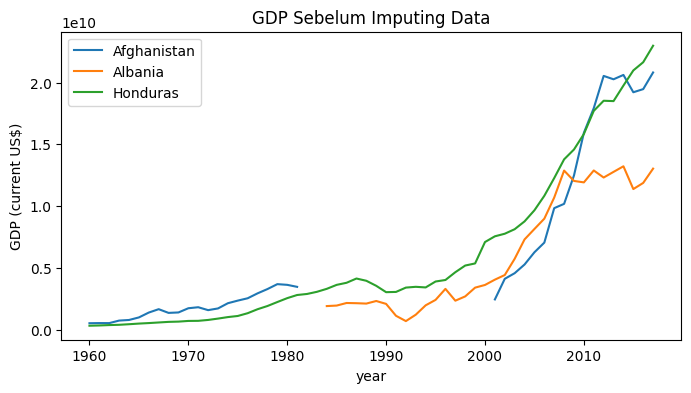

In [ ]:
#visualization sebelum imputing data
countries = ['Afghanistan', 'Albania', 'Honduras']
data = df6[df6['Country Name'].isin(countries)]

plt.figure(figsize=(8, 4))
for country in countries:
    country_data = df6[df6['Country Name'] == country]
    years = country_data.columns[4:].astype(int)
    plt.plot(years, country_data.iloc[:, 4:].values.flatten(), label=country)

plt.title('GDP Sebelum Imputing Data')
plt.xlabel('year')
plt.ylabel('GDP (current US$)')
plt.xticks(range(1960, 2011, 10)) #menampilkan thn 1960-2011 dgn interval 10th
plt.legend()

plt.show()

In [ ]:
#atasi missing values dengan imputing data(SimpleImputer)
imputer = SimpleImputer(strategy='mean')

#impute missing values, buat df baru dg imputing values serta countryname & countrycode yg diambil dari df asli
gdp_imputed = pd.DataFrame(imputer.fit_transform(df6.iloc[:, 4:]))
gdp_imputed.insert(0, 'Country Name', df6['Country Name'])
gdp_imputed.insert(1, 'Country Code', df6['Country Code'])

#set nama kolom di df baru
gdp_imputed.columns = ['Country Name', 'Country Code'] + [str(year) for year in range(1960, 2018)]

#update ke df lama
df6.update(gdp_imputed)
df6.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,70812513000,73534070006,78009484284,84536149969,92984338275,97382984894,...,2791960894,2498932961,2467703911,2584463687,2489832751543,2568666360218,2654314241134,2505671123614,2586241268471,2847927559897
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811,548888896,546666678,751111191,800000044,1006666638,...,10190529882,12486943506,15936800636,17930239400,20536542737,20264253974,20616104298,19215562179,19469022208,20815300220
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,70812513000,73534070006,78009484284,84536149969,92984338275,97382984894,...,84178035579,75492385928,82526143645,104115807986,113923162050,124912503781,126730196125,102621215573,95337203468,124209385825
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,70812513000,73534070006,78009484284,84536149969,92984338275,97382984894,...,12881352688,12044212904,11926953259,12890867539,12319784787,12776277515,13228244357,11386931490,11883682171,13039352744
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,70812513000,73534070006,78009484284,84536149969,92984338275,97382984894,...,4007353157,3660530703,3355695364,3442062830,3164615187,3281585236,3350736367,2811489409,2877311947,3012914131


In [ ]:
cek_missing_values_duplicate_data(df6)

Jumlah Missing Values:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64
Jumlah Duplikasi Data: 0


In [ ]:
year = range(1960, 2018)

for yr in year:
    df6[f'{yr}'] = df6[f'{yr}'].round(1)

df6.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,70812513000,73534070006,78009484284,84536149969,92984338275,97382984894,...,2791960894,2498932961,2467703911,2584463687,2489832751543,2568666360218,2654314241134,2505671123614,2586241268471,2847927559897
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811,548888896,546666678,751111191,800000044,1006666638,...,10190529882,12486943506,15936800636,17930239400,20536542737,20264253974,20616104298,19215562179,19469022208,20815300220
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,70812513000,73534070006,78009484284,84536149969,92984338275,97382984894,...,84178035579,75492385928,82526143645,104115807986,113923162050,124912503781,126730196125,102621215574,95337203468,124209385825
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,70812513000,73534070006,78009484284,84536149969,92984338275,97382984894,...,12881352688,12044212904,11926953259,12890867538,12319784787,12776277516,13228244357,11386931490,11883682171,13039352744
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,70812513000,73534070006,78009484284,84536149969,92984338275,97382984894,...,4007353157,3660530703,3355695364,3442062830,3164615187,3281585236,3350736367,2811489409,2877311947,3012914131


In [ ]:
df6.to_csv('cleaned_data/cleaned_gdp_data.csv', index=False)

In [ ]:
#stlh round(1)
df6.to_csv('cleaned_data/cleaned_gdp-data.csv', index=False)

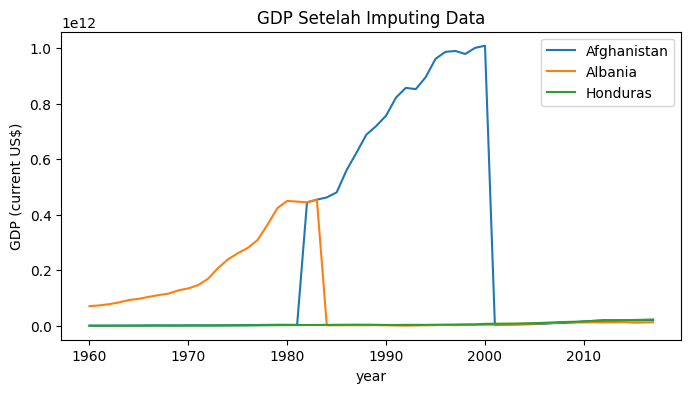

In [ ]:
#visualization setelah imputing data
countries = ['Afghanistan', 'Albania', 'Honduras']
data = df6[df6['Country Name'].isin(countries)]

plt.figure(figsize=(8, 4))
for country in countries:
    country_data = data[data['Country Name'] == country]
    years = country_data.columns[4:].astype(int)
    plt.plot(years, country_data.iloc[:, 4:].values.flatten(), label=country)

plt.title('GDP Setelah Imputing Data')
plt.xlabel('year')
plt.ylabel('GDP (current US$)')
plt.xticks(range(1960, 2011, 10)) #menampilkan thn 1960-2011 dgn interval 10th
plt.legend()

plt.show()

### **Load**

### **Visualization**

#### **a. Projects Data**

In [ ]:
# Membaca data dari file CSV
data = pd.read_csv('cleaned_data/cleaned_projects_data.csv')
print(data.dtypes)

id                           object
regionname                   object
countryname                  object
prodline                     object
lendinginstr                 object
lendinginstrtype             object
envassesmentcategorycode     object
supplementprojectflg         object
productlinetype              object
projectstatusdisplay         object
status                       object
project_name                 object
boardapprovaldate            object
board_approval_month         object
closingdate                  object
lendprojectcost             float64
ibrdcommamt                   int64
idacommamt                    int64
totalamt                      int64
grantamt                      int64
borrower                     object
impagency                    object
detail                       object
dtype: object


In [ ]:
df1.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,project_name,...,impagency,status_Active,status_Closed,status_Dropped,status_Pipeline,projectstatusdisplay_Active,projectstatusdisplay_Closed,projectstatusdisplay_Dropped,projectstatusdisplay_Pipeline,detail
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Creating a Trade in Value-Added Database for ...,...,IIST,True,False,False,False,True,False,False,False,P162228 - World - Investment Project Financing
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,C,N,L,Public-Private Partnerships and Public Investm...,...,IIST,True,False,False,False,True,False,False,False,P158768 - Islamic Republic of Afghanistan - I...
12,P164783,South Asia,Nepal,RE,Investment Project Financing,IN,C,N,L,Integrated Public Financial Management Reform ...,...,IIST,True,False,False,False,True,False,False,False,P164783 - Nepal - Investment Project Financing
14,P165286,Europe and Central Asia,Kyrgyz Republic,RE,Investment Project Financing,IN,C,N,L,Livelihoods for Youth Community Support Project,...,IIST,True,False,False,False,True,False,False,False,P165286 - Kyrgyz Republic - Investment Project...
16,P166734,East Asia and Pacific,Republic of the Union of Myanmar,RE,Investment Project Financing,IN,C,Y,L,Myanmar National Community Driven Development ...,...,IIST,True,False,False,False,True,False,False,False,P166734 - Republic of the Union of Myanmar - I...


##### **1. Visualisasi Hubungan Biaya Proyek dan Wilayah**

In [ ]:
# Visualisasi scatter plot untuk melihat hubungan antara regionname dan lendprojectcost
fig = px.scatter(data, x='regionname', y='lendprojectcost', title='Biaya Proyek berdasarkan Wilayah',
                 labels={'lendprojectcost': 'Biaya Proyek', 'regionname': 'Wilayah'})
fig.show()

In [ ]:
fig = px.scatter(data, x='countryname', y='lendprojectcost', color='projectstatusdisplay',
                 title='Biaya Proyek berdasarkan Negara dan Status Proyek',
                 labels={'lendprojectcost': 'Biaya Proyek', 'countryname': 'Negara'},
                 category_orders={'projectstatusdisplay': ['Active', 'Closed', 'Cancelled', 'Dropped', 'Pipeline']})
fig.show()

In [ ]:
fig = px.scatter(data, x='lendprojectcost', y='countryname', color='projectstatusdisplay', symbol='prodline',
                 title='Biaya Proyek berdasarkan Negara, Status Proyek, dan Jenis Produk',
                 labels={'lendprojectcost': 'Biaya Proyek', 'countryname': 'Negara'},
                 category_orders={'projectstatusdisplay': ['Active', 'Closed', 'Cancelled', 'Dropped', 'Pipeline']},
                 width=1000, height=600)
fig.show()

In [ ]:
# Visualisasi scatter plot untuk melihat hubungan antara lendprojectcost, projectstatusdisplay, dan prodline
fig = px.scatter(data, x='lendprojectcost', y='projectstatusdisplay', color='prodline',
                 title='Biaya Proyek berdasarkan Status Proyek dan Jenis Produk',
                 labels={'lendprojectcost': 'Biaya Proyek', 'projectstatusdisplay': 'Status Proyek'},
                 category_orders={'projectstatusdisplay': ['Active', 'Closed', 'Cancelled', 'Dropped', 'Pipeline']},
                 width=1000, height=600)
fig.show()

##### 1. Analisis Deskriptif

In [ ]:
# 1. Analisis Deskriptif untuk kolom numerik
deskriptif_numerik = data[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].describe()
display(deskriptif_numerik)

,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt
count,8379,8379,8379,8379,8379
mean,0,23663724,0,23663725,2933658
std,0,31312661,0,31312660,10129096
min,0,0,0,0,0
25%,0,0,0,0,0
50%,0,8800000,0,8800000,0
75%,0,38300000,0,38300000,1325000
max,1,124000000,0,124000000,248000000


##### 2. Analisis Distributif

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


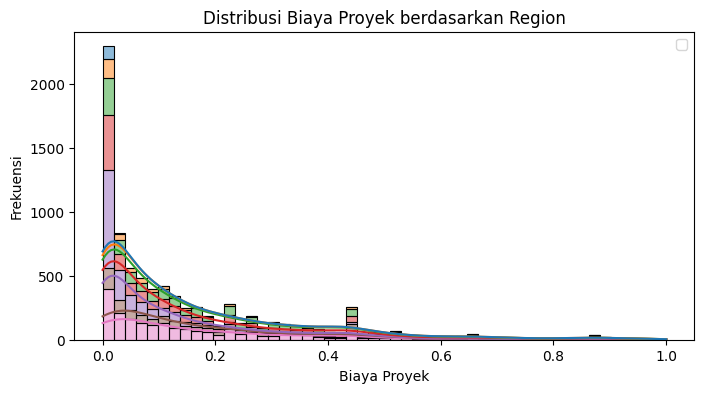

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


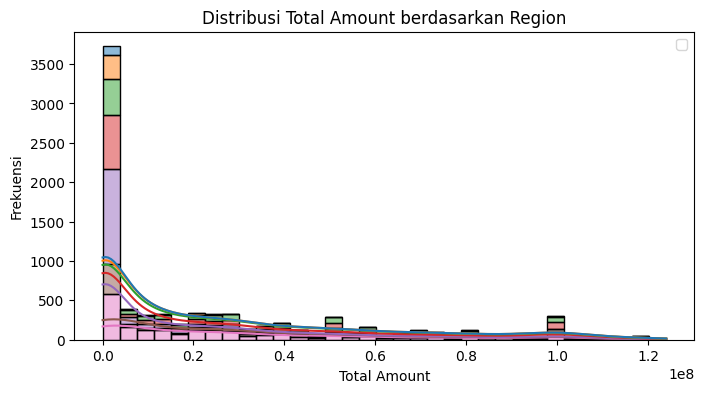

In [ ]:
# 2. Analisis Distribusi untuk kolom lendprojectcost dan totalamt
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='lendprojectcost', hue='regionname', kde=True, multiple="stack")
plt.title('Distribusi Biaya Proyek berdasarkan Region')
plt.xlabel('Biaya Proyek')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='totalamt', hue='regionname', kde=True, multiple="stack")
plt.title('Distribusi Total Amount berdasarkan Region')
plt.xlabel('Total Amount')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

##### 3. Analisis Korelasi

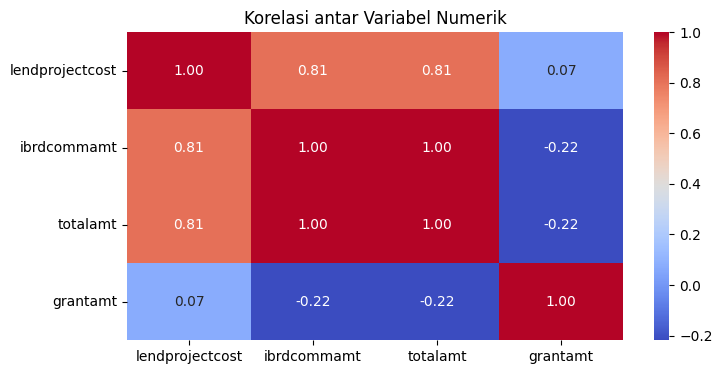

In [ ]:
# 3. Analisis Korelasi antara lendprojectcost, ibrdcommamt, idacommamt, totalamt, dan grantamt
kolom_numerik = ['lendprojectcost', 'ibrdcommamt', 'totalamt', 'grantamt']
korelasi = data[kolom_numerik].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Variabel Numerik')
plt.show()

##### 4. Analisis Perbandingan

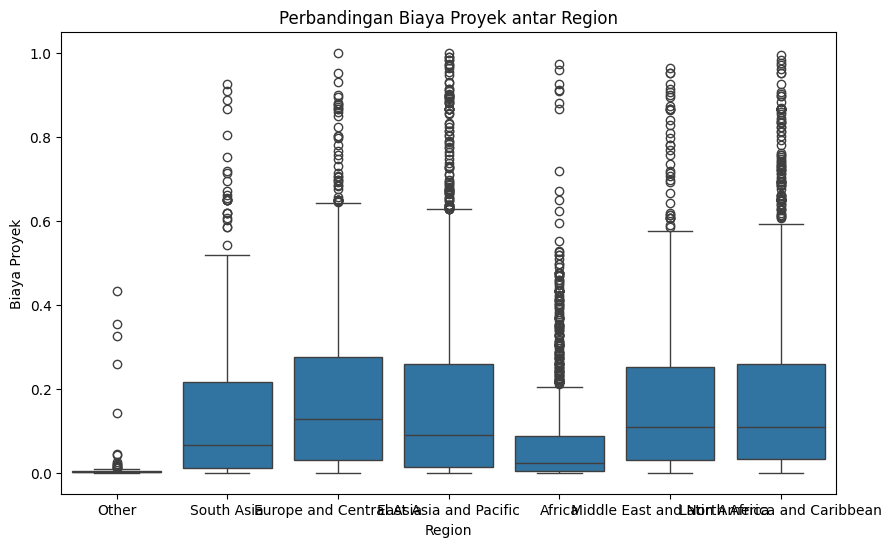

In [ ]:
# 4. Analisis Perbandingan biaya proyek antar Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='regionname', y='lendprojectcost', data=data)
plt.title('Perbandingan Biaya Proyek antar Region')
plt.xlabel('Region')
plt.ylabel('Biaya Proyek')
plt.show()

##### 5. Analisis Tren

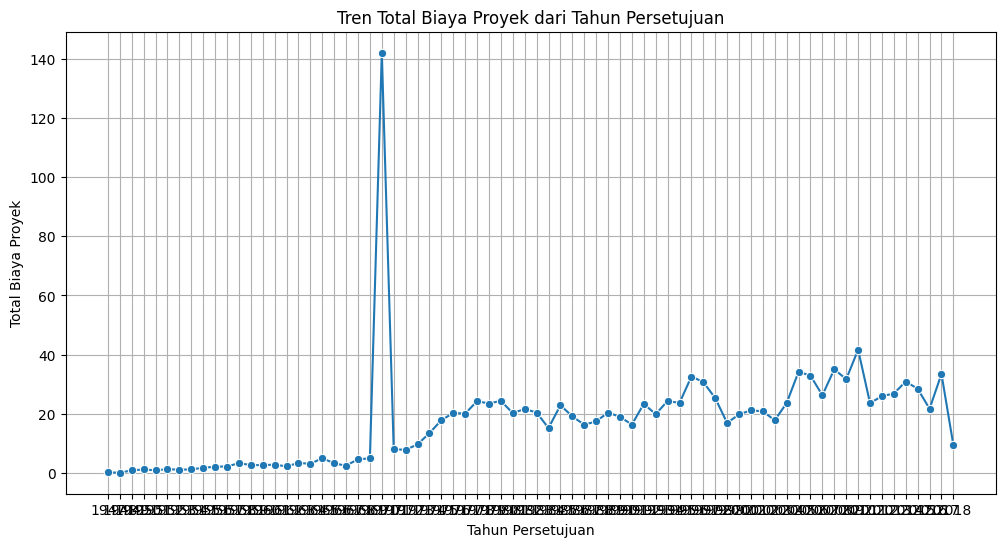

In [ ]:
# 5. Analisis Tren (jika ada kolom tanggal)
# Konversi kolom tanggal ke format datetime
data['boardapprovaldate'] = pd.to_datetime(data['boardapprovaldate'])
data['closingdate'] = pd.to_datetime(data['closingdate'])

# Menghitung tahun persetujuan proyek
data['year_approved'] = data['boardapprovaldate'].dt.year

# Mengelompokkan data berdasarkan tahun persetujuan dan menghitung total biaya proyek untuk setiap tahun
total_cost_by_year = data.groupby('year_approved')['lendprojectcost'].sum().reset_index()

# Visualisasi tren biaya proyek dari tahun persetujuan
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_approved', y='lendprojectcost', data=total_cost_by_year, marker='o')
plt.title('Tren Total Biaya Proyek dari Tahun Persetujuan')
plt.xlabel('Tahun Persetujuan')
plt.ylabel('Total Biaya Proyek')
plt.grid(True)
plt.xticks(total_cost_by_year['year_approved'])
plt.show()